In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
@vectorize(0,1)
def vdiff(f,y):
    return diff(f,y)

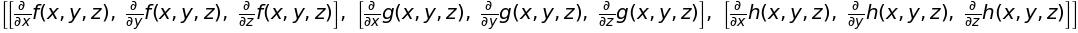

In [3]:
vdiff([f(x, y, z), g(x, y, z), h(x, y, z)], [x, y, z])

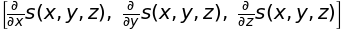

In [4]:
s = symbols("s",cls=Function)
vdiff(s(x,y,z),[x,y,z])

In [5]:
from sympy.vector import CoordSys3D, gradient, Del
# 1 gradient
C = CoordSys3D('C')

delop = Del() # nabla算子

# 标量场 f = x**2*y-xy
f = C.x**2*C.y - C.x*C.y

res = delop.gradient(f, doit=True) # 使用nabla算子
# res = delop(f).doit()

res = gradient(f) # 直接使用gradient
print(res) # (2*C.x*C.y - C.y)*C.i + (C.x**2 - C.x)*C.j

(2*C.x*C.y - C.y)*C.i + (C.x**2 - C.x)*C.j


In [6]:
f = symbols('f', cls=Function)

In [7]:
diff(x**2*y-x*y,x), diff(x**2*y-x*y,y)

In [8]:
from sympy.vector import CoordSys3D,gradient,Del
D = CoordSys3D('D')
delop = Del()
s = Function('s')(D.x,D.y,D.z)
delta_s = delop.gradient(s,doit=True)
print(delta_s)

(Derivative(s(D.x, D.y, D.z), D.x))*D.i + (Derivative(s(D.x, D.y, D.z), D.y))*D.j + (Derivative(s(D.x, D.y, D.z), D.z))*D.k


In [9]:
init_printing(use_unicode=True)

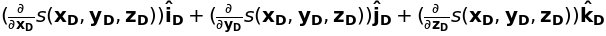

In [10]:
diff(s,D.x)*D.i + diff(s, D.y)*D.j +  diff(s,D.z)*D.k

### Differential Operations for Scalars, Vectors, and Tensors in Cartesian Coordinates

In [11]:
from sympy.vector import CoordSys3D,gradient,Del
C = CoordSys3D('C')
Vx = Function('Vx')
Vy = Function('Vy')
Vz = Function('Vz')
V = Function('Vx')(C.x) + Function('Vy')(C.y) + Function('Vz')(C.z)
delta_V = Del().gradient(V,doit=True)
print(delta_V)

(Derivative(Vx(C.x), C.x))*C.i + (Derivative(Vy(C.y), C.y))*C.j + (Derivative(Vz(C.z), C.z))*C.k


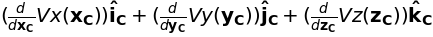

In [12]:
(Derivative(Vx(C.x), C.x))*C.i + (Derivative(Vy(C.y), C.y))*C.j + (Derivative(Vz(C.z), C.z))*C.k

In [13]:
V = Function('Vx')(C.x,C.y,C.z) + Function('Vy')(C.x,C.y,C.z) + Function('Vz')(C.x,C.y,C.z)

In [14]:
DiffV = Del().gradient(V,doit=True)

In [15]:
(C.i).cross(C.i), (C.i).cross(C.j),(C.i).cross(C.k)

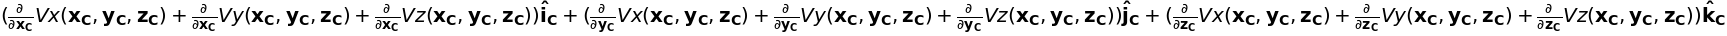

In [16]:
DiffV

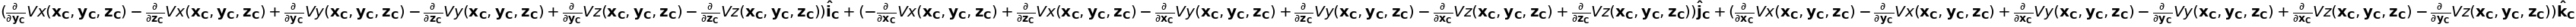

In [17]:
DiffV.cross(C.i) + DiffV.cross(C.j) + DiffV.cross(C.k)

In [18]:
V1 = (Function('Vx')(C.x,C.y,C.z) + Function('Vy')(C.x,C.y,C.z) + Function('Vz')(C.x,C.y,C.z))*(C.i)

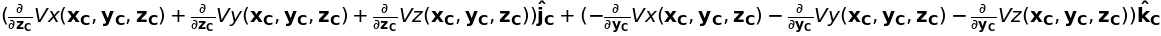

In [19]:
Del().cross(V1,doit=True)

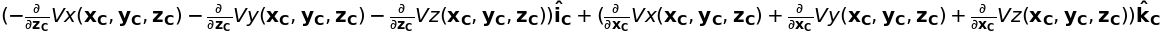

In [20]:
V2 = (Function('Vx')(C.x,C.y,C.z) + Function('Vy')(C.x,C.y,C.z) + Function('Vz')(C.x,C.y,C.z))*(C.j)
Del().cross(V2,doit=True)

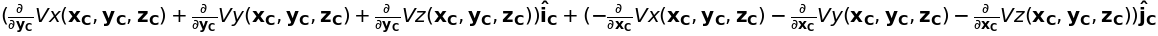

In [21]:
V3 = (Function('Vx')(C.x,C.y,C.z) + Function('Vy')(C.x,C.y,C.z) + Function('Vz')(C.x,C.y,C.z))*(C.k)
Del().cross(V3,doit=True)

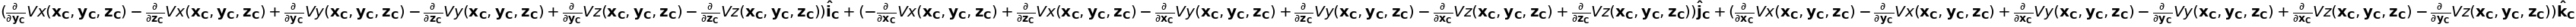

In [22]:
Del().cross(V1,doit=True) + Del().cross(V2,doit=True) + Del().cross(V3,doit=True)

In [23]:
from sympy.vector import CoordSys3D,gradient,Del
C = CoordSys3D('C')
Vx = Function('Vx')
Vy = Function('Vy')
Vz = Function('Vz')
V = (Function('Vx')(C.x,C.y,C.z) + Function('Vy')(C.x,C.y,C.z) + Function('Vz')(C.x,C.y,C.z))*(C.i)
delta_V = Del().dot(V,doit=True)
print(delta_V)

Derivative(Vx(C.x, C.y, C.z), C.x) + Derivative(Vy(C.x, C.y, C.z), C.x) + Derivative(Vz(C.x, C.y, C.z), C.x)


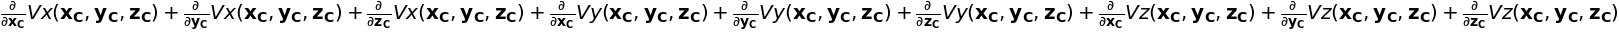

In [24]:
Derivative(Vx(C.x, C.y, C.z), C.x) + Derivative(Vx(C.x, C.y, C.z), C.y) + Derivative(Vx(C.x, C.y, C.z), C.z) + Derivative(Vy(C.x, C.y, C.z), C.x) + Derivative(Vy(C.x, C.y, C.z), C.y) + Derivative(Vy(C.x, C.y, C.z), C.z) + Derivative(Vz(C.x, C.y, C.z), C.x) + Derivative(Vz(C.x, C.y, C.z), C.y) + Derivative(Vz(C.x, C.y, C.z), C.z)

Del().dot((Vx(C.x,C.y,C.z))*C.i, doit=True) + Del().dot((Vy(C.x,C.y,C.z))*C.j,doit=True) + Del().dot((Vz(C.x,C.y,C.z))*C.k,doit=True)

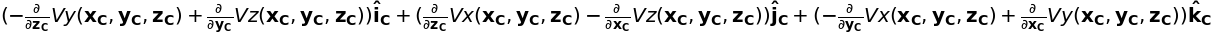

In [25]:
Del().cross((Vx(C.x,C.y,C.z))*C.i, doit=True) + Del().cross((Vy(C.x,C.y,C.z))*C.j,doit=True) + Del().cross((Vz(C.x,C.y,C.z))*C.k,doit=True)

# Transport Phenomena

### Algerbraic Operations for vectors and tensors in cartesian coordinates

In [26]:
from sympy import *
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [27]:
from sympy.vector import CoordSys3D
C = CoordSys3D("C")
V, W = symbols("V W")
Vx,Vy,Vz = symbols('V(x:z)')
Wx,Wy,Wz = symbols("W(x:z)")
V = Vx*C.i+Vy*C.j+Vz*C.k
W = Wx*C.i+Wy*C.j+Wz*C.k

In [28]:
V.dot(W)

In [29]:
W.dot(V)

In [30]:
W.dot(V) == V.dot(W)

True

In [31]:
V.cross(W)

In [32]:
(V.cross(W)).dot(C.i), (V.cross(W)).dot(C.j), (V.cross(W)).dot(C.k)

In [33]:
(W.cross(V)).dot(C.i), (W.cross(V)).dot(C.j), (W.cross(V)).dot(C.k)

In [34]:
((V.cross(W)).dot(C.i), (V.cross(W)).dot(C.j), (V.cross(W)).dot(C.k)) == (-(W.cross(V)).dot(C.i), -(W.cross(V)).dot(C.j), -(W.cross(V)).dot(C.k))

True

In [35]:
𝑇𝑥𝑥, 𝑇𝑥𝑦, 𝑇𝑥𝑧 = symbols("Tx(x:z)")
𝑇𝑦𝑥, 𝑇𝑦𝑦, 𝑇𝑦𝑧 = symbols("Ty(x:z)")
𝑇𝑧𝑥, 𝑇𝑧𝑦, 𝑇𝑧𝑧 = symbols("Tz(x:z)")

In [36]:
𝑇𝑥𝑥, 𝑇𝑥𝑦, 𝑇𝑥𝑧, 𝑇𝑦𝑥, 𝑇𝑦𝑦, 𝑇𝑦𝑧, 𝑇𝑧𝑥, 𝑇𝑧𝑦, 𝑇𝑧𝑧 = symbols("Tx(x:z), Ty(x:z), Tz(x:z)")

In [37]:
T = symbols("T")
T = Matrix([[𝑇𝑥𝑥, 𝑇𝑥𝑦, 𝑇𝑥𝑧],[𝑇𝑦𝑥, 𝑇𝑦𝑦, 𝑇𝑦𝑧],[𝑇𝑧𝑥, 𝑇𝑧𝑦, 𝑇𝑧𝑧]])

In [38]:
V.to_matrix(C)

⎡Vx⎤
⎢  ⎥
⎢Vy⎥
⎢  ⎥
⎣Vz⎦

In [39]:
T*(V.to_matrix(C)) == T*V.to_matrix(C)

True

In [40]:
(T*V.to_matrix(C)).row(0), (T*V.to_matrix(C)).row(1), (T*V.to_matrix(C)).row(2)

([Txx⋅Vx + Txy⋅Vy + Txz⋅Vz], [Tyx⋅Vx + Tyy⋅Vy + Tyz⋅Vz], [Tzx⋅Vx + Tzy⋅Vy + Tz
z⋅Vz])

In [41]:
T*V.to_matrix(C)

⎡Txx⋅Vx + Txy⋅Vy + Txz⋅Vz⎤
⎢                        ⎥
⎢Tyx⋅Vx + Tyy⋅Vy + Tyz⋅Vz⎥
⎢                        ⎥
⎣Tzx⋅Vx + Tzy⋅Vy + Tzz⋅Vz⎦

In [42]:
V.to_matrix(C),T

⎛⎡Vx⎤  ⎡Txx  Txy  Txz⎤⎞
⎜⎢  ⎥  ⎢             ⎥⎟
⎜⎢Vy⎥, ⎢Tyx  Tyy  Tyz⎥⎟
⎜⎢  ⎥  ⎢             ⎥⎟
⎝⎣Vz⎦  ⎣Tzx  Tzy  Tzz⎦⎠

In [43]:
(V.to_matrix(C)).transpose()*T.col(0), (V.to_matrix(C)).transpose()*T.col(1), (V.to_matrix(C)).transpose()*T.col(2)

([Txx⋅Vx + Tyx⋅Vy + Tzx⋅Vz], [Txy⋅Vx + Tyy⋅Vy + Tzy⋅Vz], [Txz⋅Vx + Tyz⋅Vy + Tz
z⋅Vz])

Note: The above operations may be generalized to cylindrical coordinates by replacing (x,y,z) by (r,theta,z), and to replacing (x, y,z) by (r, theta,phi). 

In [44]:
@vectorize(0,1)
def vdiff(f,y):
    return diff(f,y)

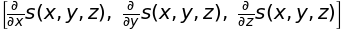

In [45]:
s = symbols("s",cls=Function)
vdiff(s(x,y,z),[x,y,z])

OR

In [46]:
s = (Function('s')(C.x,C.y,C.z))

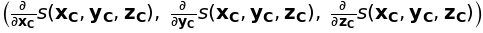

In [47]:
Del().dot(s*(C.i),doit=True), Del().dot(s*(C.j),doit=True), Del().dot(s*(C.k),doit=True)

In [49]:
from sympy.vector import CoordSys3D,gradient,Del
C = CoordSys3D('C')
vx = Function('vx')
vy = Function('vy')
vz = Function('vz')
v = Function('vx')(C.x,C.y,C.z)*(C.i) + Function('vy')(C.x,C.y,C.z)*(C.j) + Function('vz')(C.x,C.y,C.z)*(C.k)
delta_v = Del().dot(v,doit=True)
print(delta_v)

Derivative(vx(C.x, C.y, C.z), C.x) + Derivative(vy(C.x, C.y, C.z), C.y) + Derivative(vz(C.x, C.y, C.z), C.z)


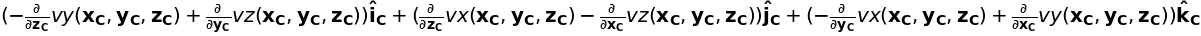

In [50]:
Del().cross((vx(C.x,C.y,C.z))*C.i, doit=True) + Del().cross((vy(C.x,C.y,C.z))*C.j,doit=True) + Del().cross((vz(C.x,C.y,C.z))*C.k,doit=True)

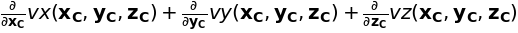

In [51]:
Del().dot((vx(C.x,C.y,C.z))*C.i, doit=True) + Del().dot((vy(C.x,C.y,C.z))*C.j, doit=True) + Del().dot((vz(C.x,C.y,C.z))*C.k, doit=True)

In [52]:
v = (Function('vx')(C.x,C.y,C.z)*(C.i) + Function('vy')(C.x,C.y,C.z)*(C.j) + Function('vz')(C.x,C.y,C.z)*(C.k))

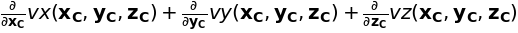

In [53]:
(Del() & v).doit() # Scalar

In [54]:
delta_S = Del().dot(s*(C.i),doit=True)*(C.i) + Del().dot(s*(C.j),doit=True)*(C.j) + Del().dot(s*(C.k),doit=True)*(C.k)

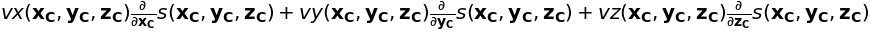

In [55]:
delta_S.dot(v)

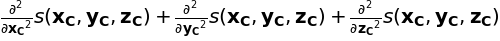

In [56]:
(Del() & delta_S).doit()

In [57]:
delta_V = diff(v.dot(C.i),C.x)*(C.i) + diff(v.dot(C.j),C.y)*(C.j) + diff(v.dot(C.i),C.z)*(C.k)

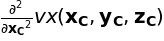

In [61]:
gradient(gradient(vx(C.x,C.y,C.z), coord_sys=C).dot(C.i)).dot(C.i)

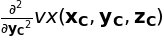

In [59]:
gradient(gradient(vx(C.x,C.y,C.z), coord_sys=C).dot(C.j)).dot(C.j)

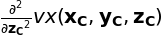

In [60]:
gradient(gradient(vx(C.x,C.y,C.z), coord_sys=C).dot(C.k)).dot(C.k)

In [62]:
v = (vx(C.x,C.y,C.z))*C.i + (vy(C.x,C.y,C.z))*C.j + (vz(C.x,C.y,C.z))*C.k

In [63]:
v.dot(C.i)

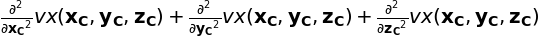

In [70]:
Del().dot(gradient(v.dot(C.i),coord_sys=C))

In [71]:
v.dot(C.j)

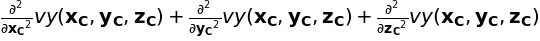

In [72]:
Del().dot(gradient(v.dot(C.j),coord_sys=C))

In [73]:
v.dot(C.k)

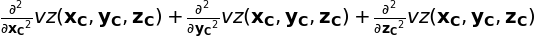

In [74]:
Del().dot(gradient(v.dot(C.k),coord_sys=C))

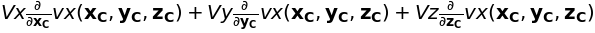

In [75]:
V.dot(gradient(v.dot(C.i),coord_sys=C))

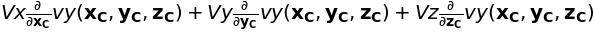

In [76]:
V.dot(gradient(v.dot(C.j),coord_sys=C))

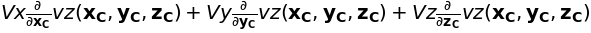

In [77]:
V.dot(gradient(v.dot(C.k),coord_sys=C))

In [145]:
vv = (v.to_matrix(C))*((v.to_matrix(C)).transpose())

In [146]:
type(vv)

sympy.matrices.immutable.ImmutableDenseMatrix

In [147]:
vv

⎡          2                                                                  
⎢        vx (C_x, C_y, C_z)           vx(C_x, C_y, C_z)⋅vy(C_x, C_y, C_z)  vx(
⎢                                                                             
⎢                                               2                             
⎢vx(C_x, C_y, C_z)⋅vy(C_x, C_y, C_z)          vy (C_x, C_y, C_z)           vy(
⎢                                                                             
⎢                                                                             
⎣vx(C_x, C_y, C_z)⋅vz(C_x, C_y, C_z)  vy(C_x, C_y, C_z)⋅vz(C_x, C_y, C_z)     

                                ⎤
C_x, C_y, C_z)⋅vz(C_x, C_y, C_z)⎥
                                ⎥
                                ⎥
C_x, C_y, C_z)⋅vz(C_x, C_y, C_z)⎥
                                ⎥
       2                        ⎥
     vz (C_x, C_y, C_z)         ⎦

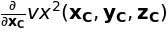

In [197]:
gradient(vv.row(0).dot(Matrix([1,0,0])),coord_sys =C,doit=False).dot(C.i)

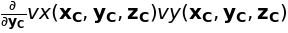

In [198]:
gradient(vv.row(0).dot(Matrix([0,1,0])),coord_sys =C,doit=False).dot(C.j)

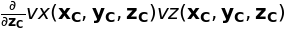

In [199]:
gradient(vv.row(0).dot(Matrix([0,0,1])),coord_sys =C,doit=False).dot(C.k)

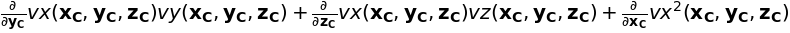

In [208]:
gradient(vv.row(0).dot(Matrix([1,0,0])),coord_sys =C,doit=False).dot(C.i) + gradient(vv.row(0).dot(Matrix([0,1,0])),coord_sys =C,doit=False).dot(C.j) + gradient(vv.row(0).dot(Matrix([0,0,1])),coord_sys =C,doit=False).dot(C.k)

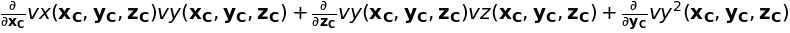

In [209]:
gradient(vv.row(1).dot(Matrix([1,0,0])),coord_sys =C,doit=False).dot(C.i) + gradient(vv.row(1).dot(Matrix([0,1,0])),coord_sys =C,doit=False).dot(C.j) + gradient(vv.row(1).dot(Matrix([0,0,1])),coord_sys =C,doit=False).dot(C.k)

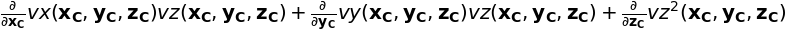

In [210]:
gradient(vv.row(2).dot(Matrix([1,0,0])),coord_sys =C,doit=False).dot(C.i) + gradient(vv.row(2).dot(Matrix([0,1,0])),coord_sys =C,doit=False).dot(C.j) + gradient(vv.row(2).dot(Matrix([0,0,1])),coord_sys =C,doit=False).dot(C.k)

In [236]:
Txx = Function("Txx")(C.x,C.y,C.z)
Txy = Function("Txy")(C.x,C.y,C.z)
Txz = Function("Txz")(C.x,C.y,C.z)
Tyx = Function("Tyx")(C.x,C.y,C.z)
Tyy = Function("Tyy")(C.x,C.y,C.z)
Tyz = Function("Tyz")(C.x,C.y,C.z)
Tzx = Function("Tzx")(C.x,C.y,C.z)
Tzy = Function("Tzy")(C.x,C.y,C.z)
Tzz = Function("Tzz")(C.x,C.y,C.z)

In [282]:
T = Matrix([[Txx,Txy,Txz],[Tyx,Tyy,Tyz],[Tzx,Tzy,Tzz]])

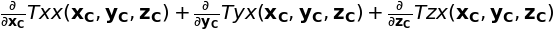

In [245]:
gradient(T.row(0).dot((C.i).to_matrix(C)), doit=False).dot(C.i) + gradient(T.row(0).dot((C.j).to_matrix(C)), doit=False).dot(C.j) + gradient(T.row(0).dot((C.k).to_matrix(C)), doit=False).dot(C.k)

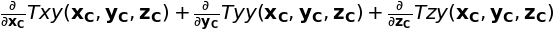

In [246]:
gradient(T.row(1).dot((C.i).to_matrix(C)), doit=False).dot(C.i) + gradient(T.row(1).dot((C.j).to_matrix(C)), doit=False).dot(C.j) + gradient(T.row(1).dot((C.k).to_matrix(C)), doit=False).dot(C.k)

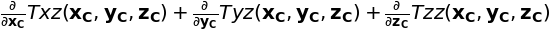

In [247]:
gradient(T.row(2).dot((C.i).to_matrix(C)), doit=False).dot(C.i) + gradient(T.row(2).dot((C.j).to_matrix(C)), doit=False).dot(C.j) + gradient(T.row(2).dot((C.k).to_matrix(C)), doit=False).dot(C.k)

In [255]:
v

In [270]:
v.to_matrix(C)

⎡vx(C_x, C_y, C_z)⎤
⎢                 ⎥
⎢vy(C_x, C_y, C_z)⎥
⎢                 ⎥
⎣vz(C_x, C_y, C_z)⎦

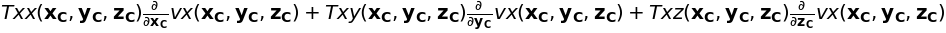

In [286]:
T.row(0).dot(gradient(v.dot(C.i),doit=True).to_matrix(C))

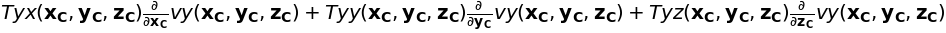

In [287]:
T.row(1).dot(gradient(v.dot(C.j),doit=True).to_matrix(C))

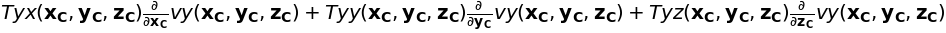

In [285]:
T.row(1).dot(gradient(v.dot(C.j),doit=True).to_matrix(C))

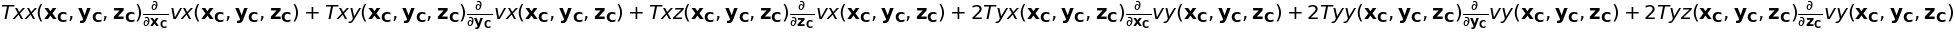

In [288]:
T.row(0).dot(gradient(v.dot(C.i),doit=True).to_matrix(C)) + T.row(1).dot(gradient(v.dot(C.j),doit=True).to_matrix(C)) + T.row(1).dot(gradient(v.dot(C.j),doit=True).to_matrix(C))